# Q4 Expectation Maximization Algorithm

In [2]:
import numpy as np
 # for reproducible results
np.random.seed(110)
# setting the parameters for red and blue distributions we will draw from
red_mean = 3
red_std = 0.8
blue_mean = 7
blue_std = 2
# drawing 20 samples from each normal distribution
red = np.random.normal(red_mean, red_std, size=20)
blue = np.random.normal(blue_mean, blue_std, size=20)
# array with every sample point (for later use)
both_colours = np.sort(np.concatenate((red, blue))) 

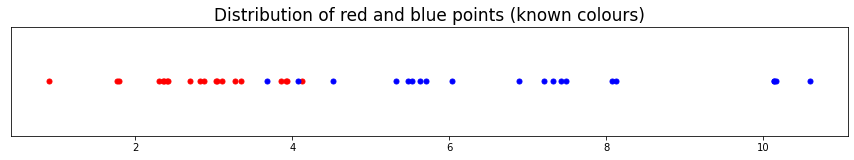

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15, 2)

plt.plot(red, np.zeros_like(red), '.', color='r', markersize=10);
plt.plot(blue, np.zeros_like(blue), '.', color='b', markersize=10);
plt.title(r'Distribution of red and blue points (known colours)', fontsize=17);
plt.yticks([]);

In [4]:
np.mean(red)

2.8132116984626867

In [5]:
np.std(red)

0.8001119672360739

In [6]:
np.mean(blue)

6.972553898467638

In [7]:
np.std(blue)

2.0388437926931493

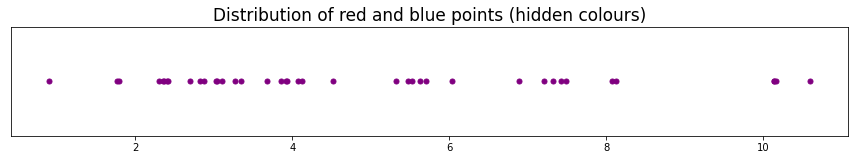

In [8]:
#creating hidden variables by painting all points purple
plt.rcParams['figure.figsize'] = (15, 2)

plt.plot(both_colours, np.zeros_like(both_colours), '.', color='purple', markersize=10);
plt.title(r'Distribution of red and blue points (hidden colours)', fontsize=17);
plt.yticks([]);

In [9]:
#we need to find the likelihood function as expectation maximization tries to find values that would make the output of this function greatest
#Probability density function is accessed via the Scipy module
from scipy import stats
#For example if the mean of our distribution is 50 and the standard deviation is 15, we can see that we are roughly 10 times more likely to draw the value 61 rather than 84
stats.norm(50, 15).pdf([61, 84])


array([0.02032553, 0.00203781])

In [10]:
# Compute the weight for each colour at each data point.
def weight_of_colour(colour_likelihood, total_likelihood):
    return colour_likelihood / total_likelihood

In [11]:
#functions to estimate new mean and standard deviation
def estimate_mean(data, weight):
    return np.sum(data * weight) / np.sum(weight)
def estimate_std(data, weight, mean):
    variance = np.sum(weight * (data - mean)**2) / np.sum(weight)
    return np.sqrt(variance)

In [12]:
# Initial estimates for the mean
red_mean_guess = 1.1
blue_mean_guess = 9

# Initial estimates for the standard deviation
red_std_guess = 2
blue_std_guess = 1.7

In [13]:
#function to plot red and blue bell curves
def plot_guesses(red_mean_guess, blue_mean_guess, red_std_guess, blue_std_guess, alpha=1):
    # set figure size and plot the purple dots
    plt.rcParams['figure.figsize'] = (15, 5)
    plt.plot(both_colours, np.zeros_like(both_colours), '.', color='purple', markersize=10)   
    # compute the size of the x axis
    lo = np.floor(both_colours.min()) - 1
    hi = np.ceil(both_colours.max()) + 1
    x = np.linspace(lo, hi, 500)
    # plot the bell curves
    plt.plot(x, stats.norm(red_mean_guess, red_std_guess).pdf(x), color='r', alpha=alpha)
    plt.plot(x, stats.norm(blue_mean_guess, blue_std_guess).pdf(x), color='b', alpha=alpha)
    r_height = stats.norm(red_mean_guess, red_std_guess).pdf(red_mean_guess)
    b_height = stats.norm(blue_mean_guess, blue_std_guess).pdf(blue_mean_guess)
    
    plt.vlines(red_mean_guess, 0, r_height, 'r', '--', alpha=alpha)
    plt.vlines(blue_mean_guess, 0, b_height, 'b', '--', alpha=alpha);

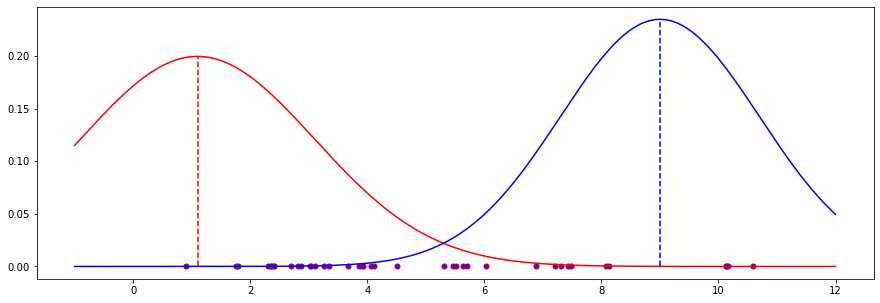

In [14]:
#Plotting Initial Guesses
plot_guesses(red_mean_guess, blue_mean_guess, red_std_guess, blue_std_guess)


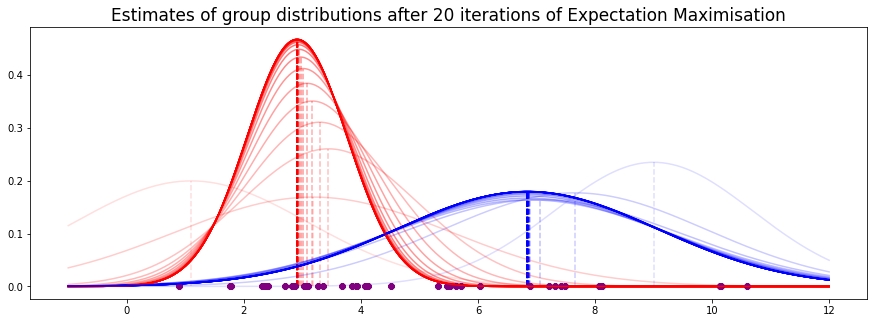

In [15]:
#Performing multiple iterations of Expectation Maximization
red_mean_guess = 1.1
blue_mean_guess = 9
red_std_guess = 2
blue_std_guess = 1.7
N_ITER = 20 
alphas = np.linspace(0.2, 1, N_ITER) 
plot_guesses(red_mean_guess, blue_mean_guess, red_std_guess, blue_std_guess, alpha=0.13)
for i in range(N_ITER):
    likelihood_of_red = stats.norm(red_mean_guess, red_std_guess).pdf(both_colours)
    likelihood_of_blue = stats.norm(blue_mean_guess, blue_std_guess).pdf(both_colours)
    red_weight = weight_of_colour(likelihood_of_red, likelihood_of_red+likelihood_of_blue)
    blue_weight = weight_of_colour(likelihood_of_blue, likelihood_of_red+likelihood_of_blue)
    red_std_guess = estimate_std(both_colours, red_weight, red_mean_guess)
    blue_std_guess = estimate_std(both_colours, blue_weight, blue_mean_guess)
    red_mean_guess = estimate_mean(both_colours, red_weight)
    blue_mean_guess = estimate_mean(both_colours, blue_weight)
    plot_guesses(red_mean_guess, blue_mean_guess, red_std_guess, blue_std_guess, alpha=alphas[i])   
plt.title(
    r'Estimates of group distributions after {} iterations of Expectation Maximisation'.format(
        N_ITER
    ), 
    fontsize=17);

In [18]:
#Comparing our estimates to true values for mean and standard deviation
from IPython.display import Markdown

md = """
|            | True Mean      | Estimated Mean | True Std.      | Estimated Std. | 
| :--------- |:--------------:| :------------: |:-------------: |:-------------: |
| Red        | {true_r_m:.5f} | {est_r_m:.5f}  | {true_r_s:.5f} | {est_r_s:.5f}  | 
| Blue       | {true_b_m:.5f} | {est_b_m:.5f}  | {true_b_s:.5f} | {est_b_s:.5f}  |
"""

Markdown(
    md.format(
        true_r_m=np.mean(red),
        true_b_m=np.mean(blue),
        
        est_r_m=red_mean_guess,
        est_b_m=blue_mean_guess,
        
        true_r_s=np.std(red),
        true_b_s=np.std(blue),
        
        est_r_s=red_std_guess,
        est_b_s=blue_std_guess,
    )
)


|            | True Mean      | Estimated Mean | True Std.      | Estimated Std. | 
| :--------- |:--------------:| :------------: |:-------------: |:-------------: |
| Red        | 2.81321 | 2.90962  | 0.80011 | 0.85420  | 
| Blue       | 6.97255 | 6.83823  | 2.03884 | 2.22719  |
